### Major and Minor Ticks

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

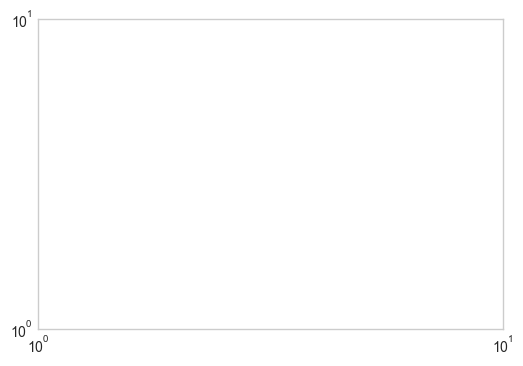

In [27]:
ax = plt.axes(xscale='log', yscale='log')

In [28]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [29]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

### Hiding Ticks or Labels

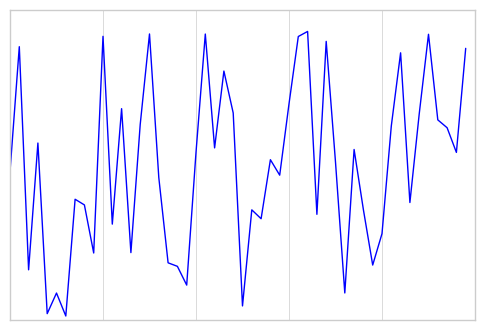

In [31]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

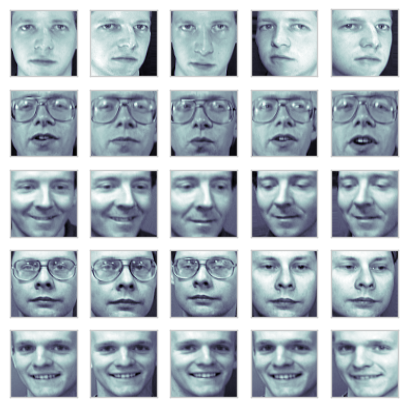

In [36]:
fig, ax = plt.subplots(5,5, figsize=(5,5))
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

### Reducing or Increasing the Number of Ticks

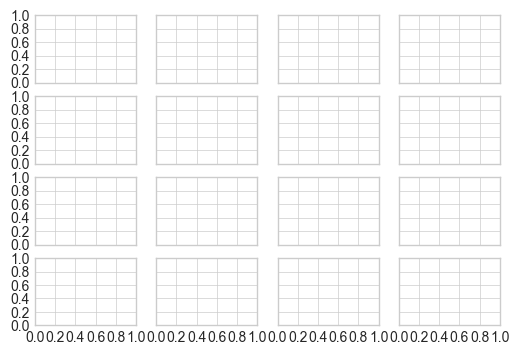

In [37]:
fig, ax = plt.subplots(4,4, sharex=True, sharey=True)

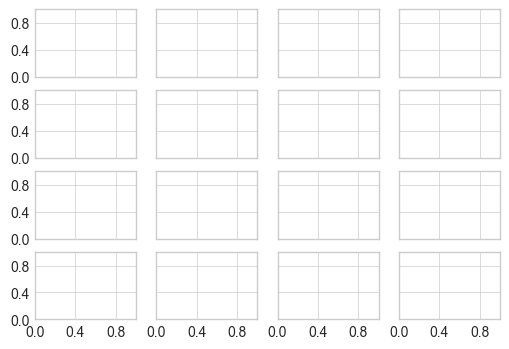

In [41]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

__Makes things cleaner__

### Fancy Tick Formats

(0, 9.42477796076938)

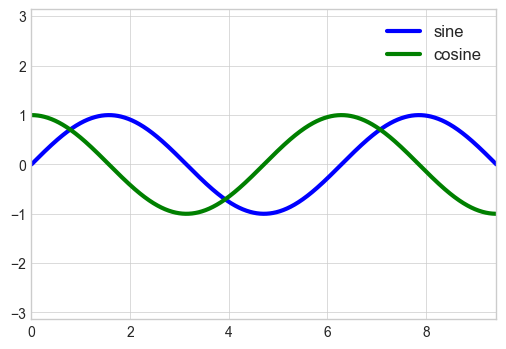

In [46]:
fig, ax = plt.subplots()
x = np.linspace(0, 3*np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='sine')
ax.plot(x, np.cos(x), lw=3, label='cosine')

# set up the grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3*np.pi)

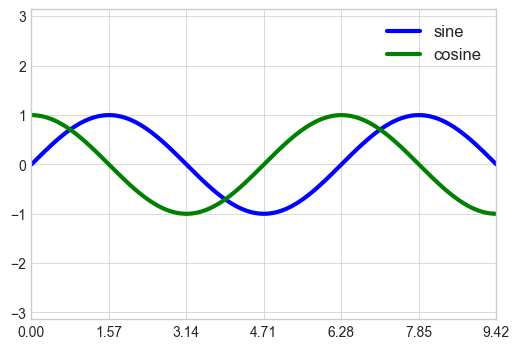

In [49]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
fig

for more fine-grained stuff, we may have to create a custom function and using `plt.FuncFormatter()`

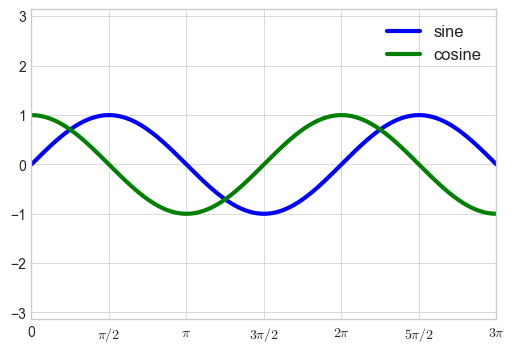

In [55]:
def format_func(value, tick_number):
    # find number of multipes of pi/2
    N = int(np.round(value/(np.pi/2)))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N//2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig
        

__We just made use of Matplotlib's LaTeX support__ e.g $\pi$

NullLocator -> No ticks

FixedLocator -  Tick locations are fixed
IndexLocator -  Locator for index plots (e.g., where x = range(len(y)))

LinearLocator - Evenly spaced ticks from min to max
LogLocator -  Logarithmically ticks from min to max
MultipleLocator - Ticks and range are a multiple of base
MaxNLocator - Finds up to a max number of ticks at nice locations
AutoLocator  -(Default) MaxNLocator with simple defaults
AutoMinorLocator - Locator for minor ticks

NullFormatter - No labels on the ticks
IndexFormatter - Set the strings from a list of labels
FixedFormatter - Set the strings manually for the labels
FuncFormatter - User-defined function sets the labels
FormatStrFormatter - Use a format string for each value
ScalarFormatter - (Default) Formatter for scalar values
LogFormatter - Default formatter for log axes